### Lab 6
#### Working with dates and times 

##### Antonio Jurlina

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/antoniojurlina/Projects/learning_python/data/')

The objective of this lab is to examine crime data from Chicago and analyze it with respect to types of crimes and temporal patterns of occurrence.

The data file, **Crimes2021.csv**, covers the period from January 1st, 2021 to March 15th, 2021.  

It includes the following attributes: *ID*, *Case Number*, *Date*, *Block*, *IUCR*, *Primary Type*, *Description*, *Location Description*, *Arrest*, *Domestic*, *Beat*, *District*, *Ward*, *Community Area*, *FBI Code*, *X Coordinate*, *Y Coordinate*, *Year*, *Updated On*, *Latitude*, *Longitude*, *Location*

For this lab I will restrict the analysis to just the *Date* and *Primary Type* (the type of crime reported).

In [34]:
crimes = pd.read_csv('Crimes2021.csv', usecols=['Date', 'Primary Type'], parse_dates=['Date']) \
    .rename(columns={'Date':'date', 'Primary Type':'type'}) \
    .sort_values('date', ignore_index=True)

crimes['date'] = crimes['date'].dt.tz_localize('US/Central')

crimes['type']    = crimes['type'].str.title()
crimes['month']   = crimes['date'].dt.month_name()
crimes['weekday'] = crimes['date'].dt.day_name()
crimes['hour']    = crimes['date'].dt.hour
crimes['week']    = crimes['date'].dt.isocalendar().week

print(crimes.shape)
crimes.head()

(35254, 6)


,date,type,month,weekday,hour,week
0,2021-01-01 00:00:00-06:00,Battery,January,Friday,0,53
1,2021-01-01 00:00:00-06:00,Other Offense,January,Friday,0,53
2,2021-01-01 00:00:00-06:00,Assault,January,Friday,0,53
3,2021-01-01 00:00:00-06:00,Sex Offense,January,Friday,0,53
4,2021-01-01 00:00:00-06:00,Criminal Damage,January,Friday,0,53


##### Monthly Crime Statistics

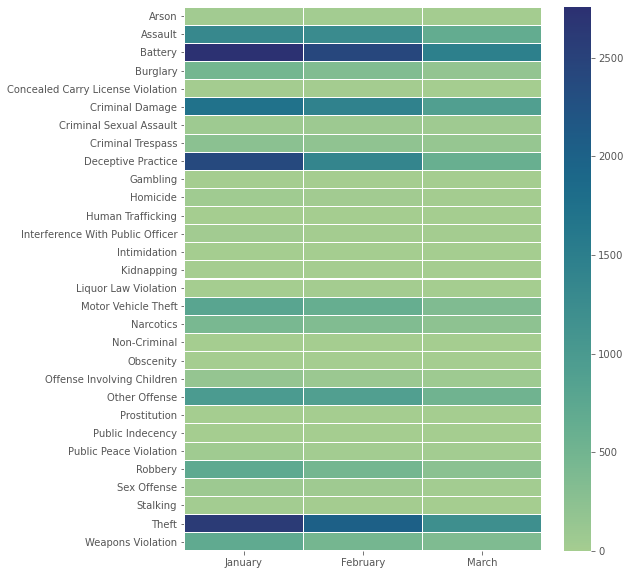

In [66]:
monthly = crimes.groupby(['month', 'type']).size().\
    reset_index().pivot_table(values=0, index='type', columns='month', fill_value=0)
monthly = monthly[['January', 'February', 'March']]

%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,10)) 

ax = sns.heatmap(monthly, linewidth=0.01, cmap='crest')
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

Overall, total counts per crime have gone down, across all types of crime, in the period from January to March. Battery, assault, criminal damage, deceptive practice and theft seem to be the most common types of crime commited in Chicago, over this period. 

##### Weekly Crime Statistics

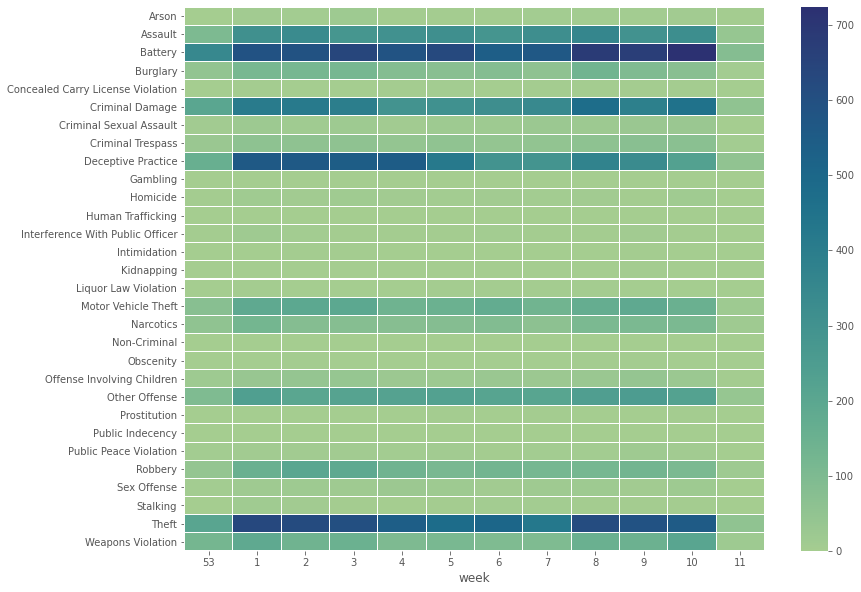

In [67]:
weekly = crimes.groupby(['week', 'type']).size().\
    reset_index().pivot_table(values=0, index='type', columns='week', fill_value=0)
cols = weekly.columns.tolist()
cols = cols[-1:] + cols[:-1]
weekly = weekly[cols]

fig, ax = plt.subplots(figsize=(13,10)) 

ax = sns.heatmap(weekly, linewidth=0.01, cmap='crest')
ax.set_ylabel("")
plt.show()

On a weekly basis, assault, battery, and theft seem to be fairly constant in the number of occurences, while the overall number of deceptive practices has gone down. 

##### Daily Crime Statistics

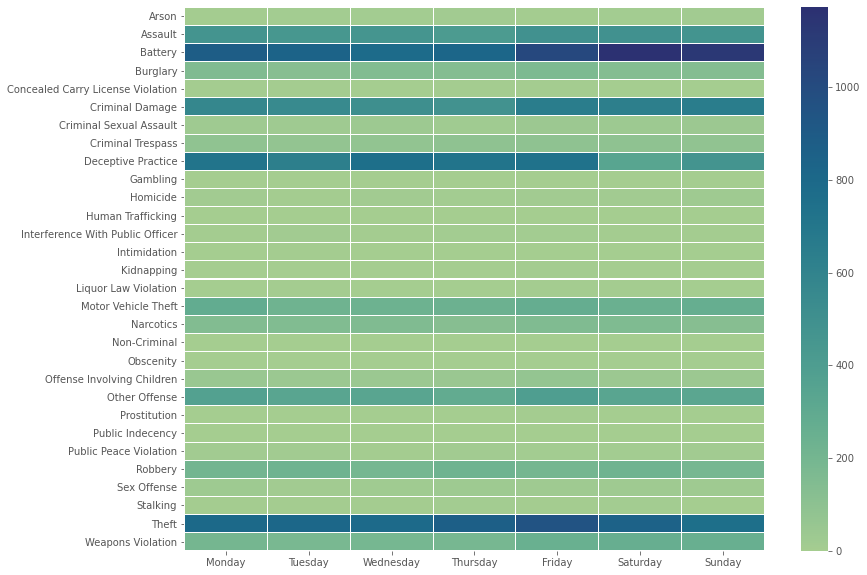

In [60]:
daily = crimes.groupby(['weekday', 'type']).size().\
    reset_index().pivot_table(values=0, index='type', columns='weekday', fill_value=0)
daily = daily[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig, ax = plt.subplots(figsize=(13,10)) 

ax = sns.heatmap(daily, linewidth=0.01, cmap='crest')
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

On a daily basis, battery seems to be most common on the weekends. Assault and criminal damage are fairly equally present throughout the week. Finally, Deceptive practices seem to decrease over the weekends.

##### Hourly Crime Statistics

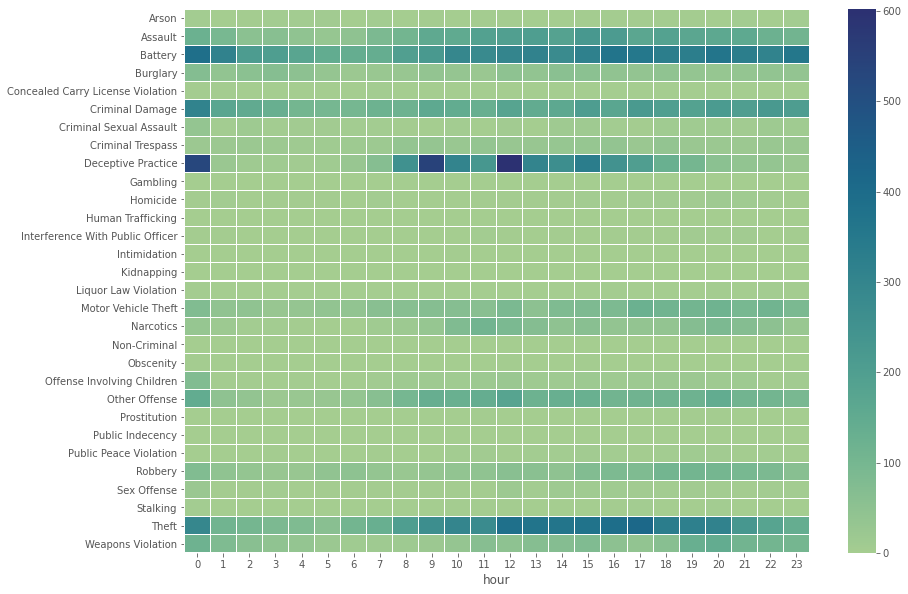

In [62]:
hourly = crimes.groupby(['hour', 'type']).size().\
    reset_index().pivot_table(values=0, index='type', columns='hour', fill_value=0)

fig, ax = plt.subplots(figsize=(14,10)) 

ax = sns.heatmap(hourly, linewidth=0.01, cmap='crest')
ax.set_ylabel("")
plt.show()

On an hourly basis, deceptive practices occur largely around midnight, 9am and noon. Most crimes do not seem to occur between 1 and 9 am, with theft, battery and assault occuring mostly in the afternoons. 

For the data and other notebooks, see [github.com/antoniojurlina/learning_python](https://github.com/antoniojurlina/learning_python).